## Fan attendance at NFL Games
**02806 Social data analysis and visualization**

**Group 36**

**Group members:**   
Birkir Fanndal Sturluson s232729 <br>
Brynjar Karl Ævarsson s232736 <br>
Védís Sigríður Ingvarsdóttir <br>

https://chat.openai.com/share/9fdb714e-8c6b-438e-a521-fd93acdc649c


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
import numpy as np
plt.style.use('seaborn-v0_8-bright')
import calplot
import folium
from sklearn.linear_model import LinearRegression

In [2]:
# Coordinates for NFL teams
stadium_coordinates = pd.read_csv("DatasetNew/NFL_stadium_coordinates.csv")

# Attendance at each game from 2000 to 2019
game_attendance = pd.read_csv("DatasetNew/NFL_Attendance_2000_2019.csv")

# Information about each game from 1999 to 2023
games = pd.read_csv("DatasetNew/games.csv")

In [3]:
games.T

,0,1,2,3,4,5,6,7,8,9,...,6696,6697,6698,6699,6700,6701,6702,6703,6704,6705
game_id,1999_01_MIN_ATL,1999_01_KC_CHI,1999_01_PIT_CLE,1999_01_OAK_GB,1999_01_BUF_IND,1999_01_SF_JAX,1999_01_CAR_NO,1999_01_NE_NYJ,1999_01_ARI_PHI,1999_01_DET_SEA,...,2023_19_LA_DET,2023_19_PIT_BUF,2023_19_PHI_TB,2023_20_HOU_BAL,2023_20_GB_SF,2023_20_TB_DET,2023_20_KC_BUF,2023_21_KC_BAL,2023_21_DET_SF,2023_22_SF_KC
season,1999.0,1999.0,1999.0,1999.0,1999.0,1999.0,1999.0,1999.0,1999.0,1999.0,...,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0
game_type,REG,REG,REG,REG,REG,REG,REG,REG,REG,REG,...,WC,WC,WC,DIV,DIV,DIV,DIV,CON,CON,SB
week,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,19.0,19.0,19.0,20.0,20.0,20.0,20.0,21.0,21.0,22.0
gameday,1999-09-12,1999-09-12,1999-09-12,1999-09-12,1999-09-12,1999-09-12,1999-09-12,1999-09-12,1999-09-12,1999-09-12,...,2024-01-14,2024-01-15,2024-01-15,2024-01-20,2024-01-20,2024-01-21,2024-01-21,2024-01-28,2024-01-28,2024-02-11
weekday,Sunday,Sunday,Sunday,Sunday,Sunday,Sunday,Sunday,Sunday,Sunday,Sunday,...,Sunday,Monday,Monday,Saturday,Saturday,Sunday,Sunday,Sunday,Sunday,Sunday
gametime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20:00,16:30,20:00,16:30,20:15,15:00,18:30,15:00,18:30,18:30
away_team,MIN,KC,PIT,OAK,BUF,SF,CAR,NE,ARI,DET,...,LA,PIT,PHI,HOU,GB,TB,KC,KC,DET,SF
away_score,17.0,17.0,43.0,24.0,14.0,3.0,10.0,30.0,25.0,28.0,...,23.0,17.0,9.0,10.0,21.0,23.0,27.0,17.0,31.0,22.0
home_team,ATL,CHI,CLE,GB,IND,JAX,NO,NYJ,PHI,SEA,...,DET,BUF,TB,BAL,SF,DET,BUF,BAL,SF,KC


In [4]:
# Dictionary to map team names to abbreviations
team_abbr = {
    'Cardinals': 'ARI',
    'Falcons': 'ATL',
    'Ravens': 'BAL',
    'Bills': 'BUF',
    'Panthers': 'CAR',
    'Bears': 'CHI',
    'Bengals': 'CIN',
    'Browns': 'CLE',
    'Cowboys': 'DAL',
    'Broncos': 'DEN',
    'Lions': 'DET',
    'Packers': 'GB',
    'Texans': 'HOU',
    'Colts': 'IND',
    'Jaguars': 'JAX',
    'Chiefs': 'KC',
    'Raiders': 'LV',
    'Chargers': 'LAC',
    'Rams': 'LA',
    'Dolphins': 'MIA',
    'Vikings': 'MIN',
    'Patriots': 'NE',
    'Saints': 'NO',
    'Giants': 'NYG',
    'Jets': 'NYJ',
    'Eagles': 'PHI',
    'Steelers': 'PIT',
    '49ers': 'SF',
    'Seahawks': 'SEA',
    'Buccaneers': 'TB',
    'Titans': 'TEN',
    'Redskins': 'WAS'
}

# Extract the last name from team names
game_attendance['last_name'] = game_attendance['team_name'].apply(lambda x: x.split()[-1])

# Map team names to abbreviations
team_abbr_map = {team: team_abbr[team] for team in game_attendance['last_name'].unique()}

# Create a new column with abbreviations
game_attendance['team_abbr'] = game_attendance['last_name'].map(team_abbr_map)



In [5]:
game_score = games
team_data = game_attendance

game_score["gameday"] = pd.to_datetime(game_score['gameday'])
game_score['year'] = game_score['gameday'].dt.year


# Filter game_score for the years 2000 to 2019
game_score_filtered = game_score[(game_score['year'] >= 2000) & (game_score['year'] <= 2019)]

# Filter team_data for the years 2000 to 2019
team_data_filtered = team_data[(team_data['year'] >= 2000) & (team_data['year'] <= 2019)]

# Convert 'week' column to int type for consistency
game_score_filtered['week'] = game_score_filtered['week'].astype(int)


# Merge the filtered datasets on team abbreviation, week, and year
merged_data = pd.merge(game_score_filtered, team_data_filtered, left_on=['home_team', 'week', 'year'], right_on=['team_abbr', 'week', 'year'], how='left')

# # Select only the necessary columns
# result = merged_data[['home_team', 'week', 'year', 'weekly_attendance']]

# # Renaming the columns for clarity
# result.rename(columns={'home_team': 'team'}, inplace=True)



C:\Users\Birkir\AppData\Local\Temp\ipykernel_9092\3584088030.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_score_filtered['week'] = game_score_filtered['week'].astype(int)


In [6]:
final_data = pd.merge(merged_data, stadium_coordinates, left_on=['team_name'], right_on=["Team"], how='left')

In [7]:
result = final_data[["game_id","season","week","gameday","weekday","wind","temp","home_team","away_team","home_score","away_score","stadium", "team","team_name","weekly_attendance","last_name","team_abbr","Team","longitude","latitude"]]

In [8]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Create a new column 'home_team_win'
result['home_team_win'] = result['home_team'] == result['winning_team']

C:\Users\Birkir\AppData\Local\Temp\ipykernel_9092\3983529507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)
C:\Users\Birkir\AppData\Local\Temp\ipykernel_9092\3983529507.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['home_team_win'] = result['home_team'] == result['winning_team']


In [46]:
# Convert 'season' column to datetime format
result['season'] = pd.to_datetime(result['season'], format='%Y')
# Extract the year component
result['season'] = result['season'].dt.year

# Filter out rows where 'season' column equals 1999
result = result[result['season'] != 1999]

C:\Users\Birkir\AppData\Local\Temp\ipykernel_9092\3092826610.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Birkir\AppData\Local\Temp\ipykernel_9092\3092826610.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
result[150:180]

,game_id,season,week,gameday,weekday,wind,temp,home_team,away_team,home_score,...,team,team_name,weekly_attendance,last_name,team_abbr,Team,longitude,latitude,winning_team,home_team_win
197,2000_12_JAX_PIT,2000,12,2000-11-19,Sunday,6.0,35.0,PIT,JAX,24.0,...,Pittsburgh,Steelers,50925.0,Steelers,PIT,Steelers,-80.015761,40.446786,JAX,False
199,2000_13_NE_DET,2000,13,2000-11-23,Thursday,NaN,NaN,DET,NE,34.0,...,Detroit,Lions,77923.0,Lions,DET,Lions,-83.045808,42.340156,DET,True
200,2000_13_MIN_DAL,2000,13,2000-11-23,Thursday,0.0,55.0,DAL,MIN,15.0,...,Dallas,Cowboys,63878.0,Cowboys,DAL,Cowboys,-97.092778,32.747778,MIN,False
201,2000_13_CLE_BAL,2000,13,2000-11-26,Sunday,7.0,55.0,BAL,CLE,44.0,...,Baltimore,Ravens,68361.0,Ravens,BAL,Ravens,-76.622767,39.277969,BAL,True
202,2000_13_PIT_CIN,2000,13,2000-11-26,Sunday,12.0,46.0,CIN,PIT,28.0,...,Cincinnati,Bengals,63925.0,Bengals,CIN,Bengals,-84.516039,39.095442,PIT,False
203,2000_13_CHI_NYJ,2000,13,2000-11-26,Sunday,6.0,53.0,NYJ,CHI,17.0,...,New York,Jets,77354.0,Jets,NYJ,Jets,-74.076983,40.812194,NYJ,True
205,2000_13_BUF_TB,2000,13,2000-11-26,Sunday,5.0,67.0,TB,BUF,31.0,...,Tampa Bay,Buccaneers,65546.0,Buccaneers,TB,Buccaneers,-82.503350,27.975967,TB,True
206,2000_13_PHI_WAS,2000,13,2000-11-26,Sunday,5.0,50.0,WAS,PHI,20.0,...,Washington,Redskins,83284.0,Redskins,WAS,Redskins,-76.864517,38.907697,PHI,False
208,2000_13_MIA_IND,2000,13,2000-11-26,Sunday,NaN,NaN,IND,MIA,14.0,...,Indianapolis,Colts,56935.0,Colts,IND,Colts,-86.163806,39.760056,MIA,False
209,2000_13_TEN_JAX,2000,13,2000-11-26,Sunday,7.0,62.0,JAX,TEN,16.0,...,Jacksonville,Jaguars,65454.0,Jaguars,JAX,Jaguars,-81.637356,30.323925,JAX,True


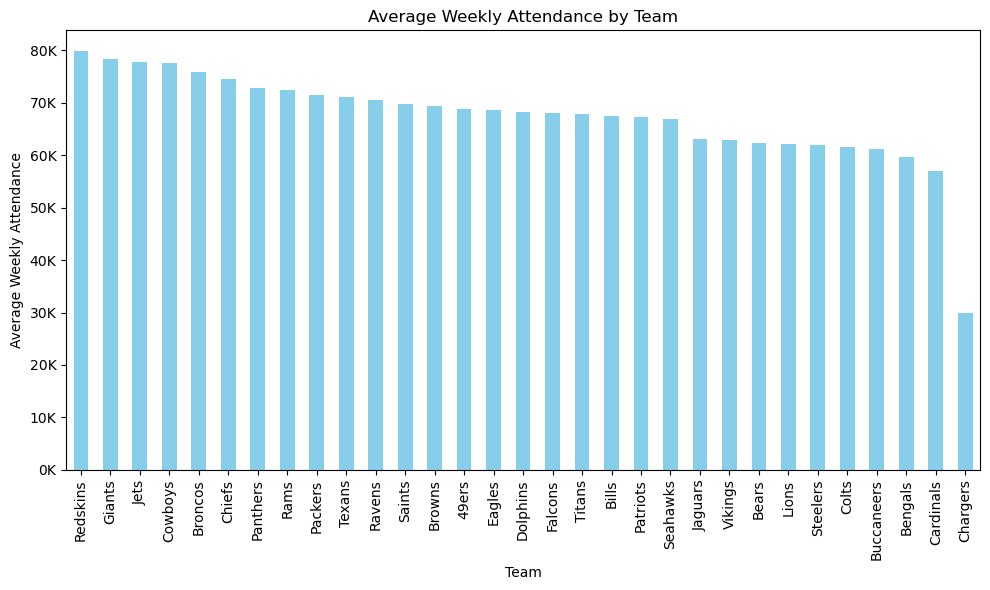

In [35]:
average_attendance = result.groupby('team_name')['weekly_attendance'].mean().sort_values(ascending=False)

# Generate the plot
plt.figure(figsize=(10, 6))
average_attendance.plot(kind='bar', color='skyblue')

# Set plot title and labels
plt.title('Average Weekly Attendance by Team')
plt.xlabel('Team')
plt.ylabel('Average Weekly Attendance')

# Calculate the maximum attendance (sum of weekly attendance for each team)
max_attendance = average_attendance.max()
max_tick = ((max_attendance + 10000) // 10000) * 10000

# Generate tick values at 10k intervals up to the maximum attendance
tick_values = range(0, int(max_tick) + 10000, 10000)
plt.yticks(tick_values, [f'{x/1000:.0f}K' for x in tick_values])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

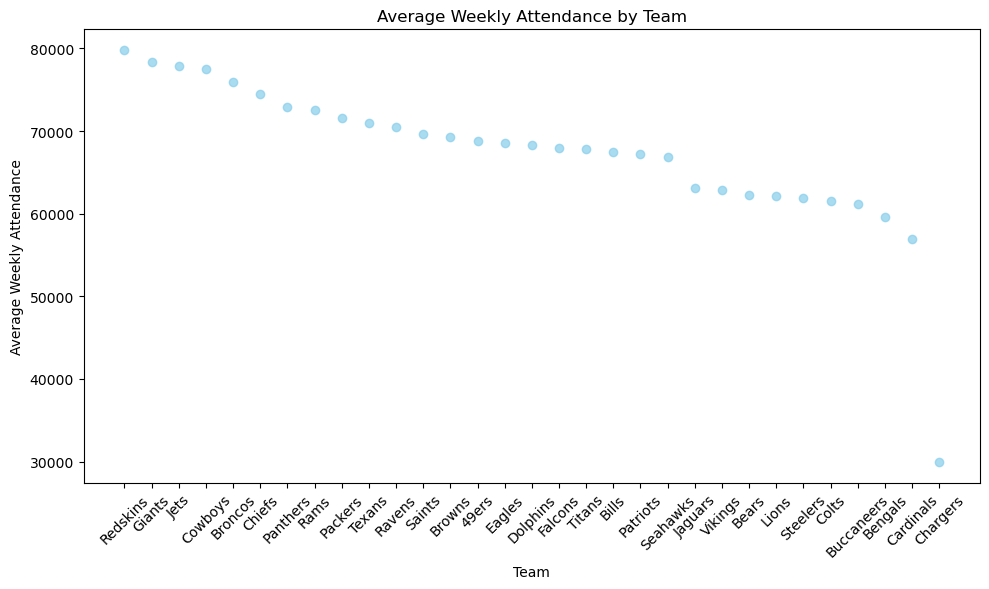

In [48]:
# Generate x and y values for the scatter plot
teams = average_attendance.index
average_attendances = average_attendance.values

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(teams, average_attendances, color='skyblue', alpha=0.7)

# Set plot title and labels
plt.title('Average Weekly Attendance by Team')
plt.xlabel('Team')
plt.ylabel('Average Weekly Attendance')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [49]:
#Calculate the number of wins for each team
home_wins = result[result['home_score'] > result['away_score']]['home_team'].value_counts()
away_wins = result[result['away_score'] > result['home_score']]['away_team'].value_counts()

# Combine home and away wins for each team
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

print(total_wins)
print(sum(total_wins))

NE     267
PIT    220
IND    210
GB     209
BAL    205
PHI    204
SEA    195
NO     192
DEN    189
DAL    171
ATL    170
MIN    169
NYG    168
KC     168
CAR    165
TEN    163
CHI    160
NYJ    154
SF     154
MIA    150
CIN    145
ARI    142
TB     141
SD     140
BUF    137
HOU    134
WAS    133
JAX    130
OAK    129
DET    114
STL    110
CLE     99
LA      39
LAC     27
Name: count, dtype: int64
5303


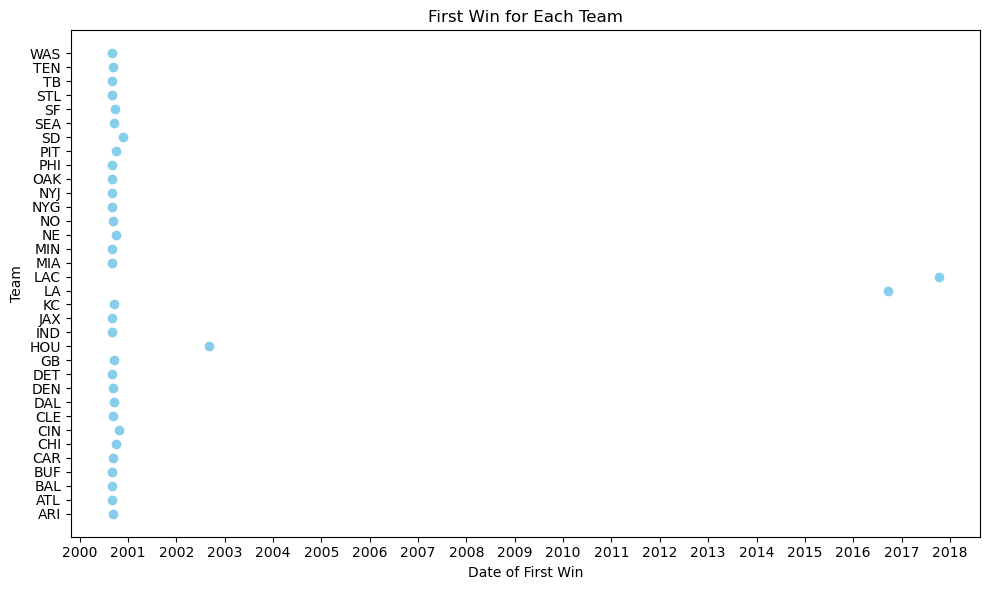

In [50]:
# Find the earliest game where each team won as a home team
home_first_win = result[result['home_score'] > result['away_score']].groupby('home_team')['gameday'].min()

# Find the earliest game where each team won as an away team
away_first_win = result[result['away_score'] > result['home_score']].groupby('away_team')['gameday'].min()

# Combine the first wins for home and away teams
first_wins = pd.concat([home_first_win, away_first_win]).groupby(level=0).min()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(first_wins, first_wins.index, color='skyblue')

# Set plot title and labels
plt.title('First Win for Each Team')
plt.xlabel('Date of First Win')
plt.ylabel('Team')

# Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Show plot
plt.tight_layout()
plt.show()

In [51]:
# Combine the first wins for home and away teams
first_wins = pd.concat([home_first_win, away_first_win]).groupby(level=0).min().reset_index()
first_wins.columns = ['Team', 'First Win']

# Create an interactive scatter plot with Plotly
fig = px.scatter(first_wins, x='First Win', y='Team', hover_data={'First Win': '|%Y-%m-%d'}, color='Team')
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.update_layout(title='First Win for Each Team', xaxis_title='Date of First Win', yaxis_title='Team')
fig.show()


In [52]:
# Create a map centered at a specific location
map = folium.Map(location=[40.7128, -74.0060], zoom_start=5)

# Keep track of plotted stadiums
plotted_stadiums = set()

# Filter out rows with NaN values for latitude or longitude
result_filtered = result.dropna(subset=['latitude', 'longitude'])

# Iterate over each row in the filtered DataFrame
for index, row in result_filtered.iterrows():
    stadium = row['stadium']
    lat = row['latitude']
    lon = row['longitude']
    
    # Check if the stadium has already been plotted
    if stadium not in plotted_stadiums:
        # Add marker to the map
        folium.Marker(location=[lat, lon], tooltip=stadium).add_to(map)
        
        # Add the stadium to the set of plotted stadiums
        plotted_stadiums.add(stadium)

# Display the map
map

In [53]:
#Er að reyna að litakóða stadiums eftir home fjölda home wins
from branca.colormap import LinearColormap

# Remove rows with NaN values in latitude and longitude columns
result = result.dropna(subset=['latitude', 'longitude'])

# Calculate the total number of home wins for each stadium
stadium_home_wins = result[result['home_score'] > result['away_score']].groupby('stadium')['home_score'].count()

# Create a map centered at a specific location
map = folium.Map(location=[40.7128, -74.0060], zoom_start=5)

# Define a gradient color scale for the number of home wins
color_scale = LinearColormap(colors=['red', 'green'], vmin=stadium_home_wins.min(), vmax=stadium_home_wins.max())

# Iterate over each row in the DataFrame
for stadium, wins in stadium_home_wins.items():
    # Get the latitude and longitude of the stadium
    lat = result[result['stadium'] == stadium]['latitude'].iloc[0]
    lon = result[result['stadium'] == stadium]['longitude'].iloc[0]
    
    # Determine color based on the total home wins for the stadium
    color = color_scale(wins)
    
    # Add marker to the map
    folium.Marker(location=[lat, lon], tooltip=f"{stadium}: {wins} home wins", icon=folium.Icon(color=color)).add_to(map)

# Add color scale to the map
color_scale.caption = 'Number of Home Wins'
map.add_child(color_scale)

# Display the map
map


C:\Users\Birkir\AppData\Local\Temp\ipykernel_9092\912534799.py:26: UserWarning:

color argument of Icon should be one of: {'darkred', 'white', 'lightred', 'lightgray', 'darkgreen', 'green', 'lightgreen', 'cadetblue', 'blue', 'pink', 'beige', 'purple', 'gray', 'red', 'orange', 'darkblue', 'black', 'lightblue', 'darkpurple'}.



In [58]:
import folium
import pandas as pd

# Create a map centered at a specific location
map = folium.Map(location=[39.8283, -98.5795] , zoom_start=4)

# Keep track of plotted stadiums
plotted_stadiums = set()

# Filter out rows with NaN values for latitude or longitude
result_filtered = result.dropna(subset=['latitude', 'longitude'])

# Calculate the number of home wins for each stadium
home_wins_per_stadium = result[result['home_team'] == result['winning_team']].groupby('stadium').size().reset_index(name='home_wins')

# Find the stadium with the most and least wins
max_wins_stadium = home_wins_per_stadium.loc[home_wins_per_stadium['home_wins'].idxmax()]
min_wins_stadium = home_wins_per_stadium.loc[home_wins_per_stadium['home_wins'].idxmin()]

# Iterate over each row in the filtered DataFrame
for index, row in result_filtered.iterrows():
    stadium = row['stadium']
    lat = row['latitude']
    lon = row['longitude']
    
    # Check if the stadium has already been plotted
    if stadium not in plotted_stadiums:
        # Determine the color based on the number of wins
        if stadium == max_wins_stadium['stadium']:
            color = 'green'
        elif stadium == min_wins_stadium['stadium']:
            color = 'red'
        else:
            # Calculate the normalized win count for intermediate colors
            stadium_wins_query = home_wins_per_stadium.loc[home_wins_per_stadium['stadium'] == stadium, 'home_wins']
            if not stadium_wins_query.empty:
                stadium_wins = int(stadium_wins_query.iloc[0])
                min_wins = int(min_wins_stadium['home_wins'])
                max_wins = int(max_wins_stadium['home_wins'])
                normalized_wins = (stadium_wins - min_wins) / (max_wins - min_wins)
                # Convert normalized wins to a color value between red and green
                color = '#%02x%02x%02x' % (int(255 * (1 - normalized_wins)), int(255 * normalized_wins), 0)
            else:
                color = 'gray'  # Assign gray color if there are no home wins data for the stadium
        
        # Add marker to the map
        folium.Marker(location=[lat, lon], tooltip=stadium, icon=folium.Icon(color=color)).add_to(map)
        
        # Add the stadium to the set of plotted stadiums
        plotted_stadiums.add(stadium)

# Display the map
map


C:\Users\Birkir\AppData\Local\Temp\ipykernel_9092\1034758649.py:47: UserWarning:

color argument of Icon should be one of: {'darkred', 'white', 'lightred', 'lightgray', 'darkgreen', 'green', 'lightgreen', 'cadetblue', 'blue', 'pink', 'beige', 'purple', 'gray', 'red', 'orange', 'darkblue', 'black', 'lightblue', 'darkpurple'}.



In [59]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Group by season and team and count the number of wins
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

print(wins_per_season)


     season winning_team  wins
0      2000          ARI     3
1      2000          ATL     4
2      2000          BAL    12
3      2000          BUF     8
4      2000          CAR     5
..      ...          ...   ...
625    2019          SEA    10
626    2019           SF     7
627    2019           TB     7
628    2019          TEN     8
629    2019          WAS     3

[630 rows x 3 columns]


C:\Users\Birkir\AppData\Local\Temp\ipykernel_9092\4188464998.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
result

,game_id,season,week,gameday,weekday,wind,temp,home_team,away_team,home_score,...,team,team_name,weekly_attendance,last_name,team_abbr,Team,longitude,latitude,winning_team,home_team_win
26,2000_01_SF_ATL,2000,1,2000-09-03,Sunday,NaN,NaN,ATL,SF,36.0,...,Atlanta,Falcons,54626.0,Falcons,ATL,Falcons,-84.400972,33.757614,ATL,True
27,2000_01_JAX_CLE,2000,1,2000-09-03,Sunday,6.0,78.0,CLE,JAX,7.0,...,Cleveland,Browns,72418.0,Browns,CLE,Browns,-81.699564,41.506022,JAX,False
28,2000_01_IND_KC,2000,1,2000-09-03,Sunday,5.0,90.0,KC,IND,14.0,...,Kansas City,Chiefs,78357.0,Chiefs,KC,Chiefs,-94.484039,39.048914,IND,False
29,2000_01_CHI_MIN,2000,1,2000-09-03,Sunday,NaN,NaN,MIN,CHI,30.0,...,Minnesota,Vikings,64104.0,Vikings,MIN,Vikings,-93.258094,44.973881,MIN,True
30,2000_01_TB_NE,2000,1,2000-09-03,Sunday,5.0,71.0,NE,TB,16.0,...,New England,Patriots,60292.0,Patriots,NE,Patriots,-71.264350,42.090925,TB,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,2019_17_TEN_HOU,2019,17,2019-12-29,Sunday,NaN,NaN,HOU,TEN,14.0,...,Houston,Texans,71794.0,Texans,HOU,Texans,-95.410956,29.684781,TEN,False
5335,2019_17_IND_JAX,2019,17,2019-12-29,Sunday,NaN,NaN,JAX,IND,38.0,...,Jacksonville,Jaguars,58472.0,Jaguars,JAX,Jaguars,-81.637356,30.323925,JAX,True
5336,2019_17_ARI_LA,2019,17,2019-12-29,Sunday,0.0,62.0,LA,ARI,31.0,...,Los Angeles,Rams,68665.0,Rams,LA,Rams,-90.188547,38.632975,LA,True
5337,2019_17_PHI_NYG,2019,17,2019-12-29,Sunday,5.0,42.0,NYG,PHI,17.0,...,New York,Giants,75029.0,Giants,NYG,Giants,-74.076983,40.812194,PHI,False


C:\Users\Birkir\AppData\Local\Temp\ipykernel_9092\1227423970.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



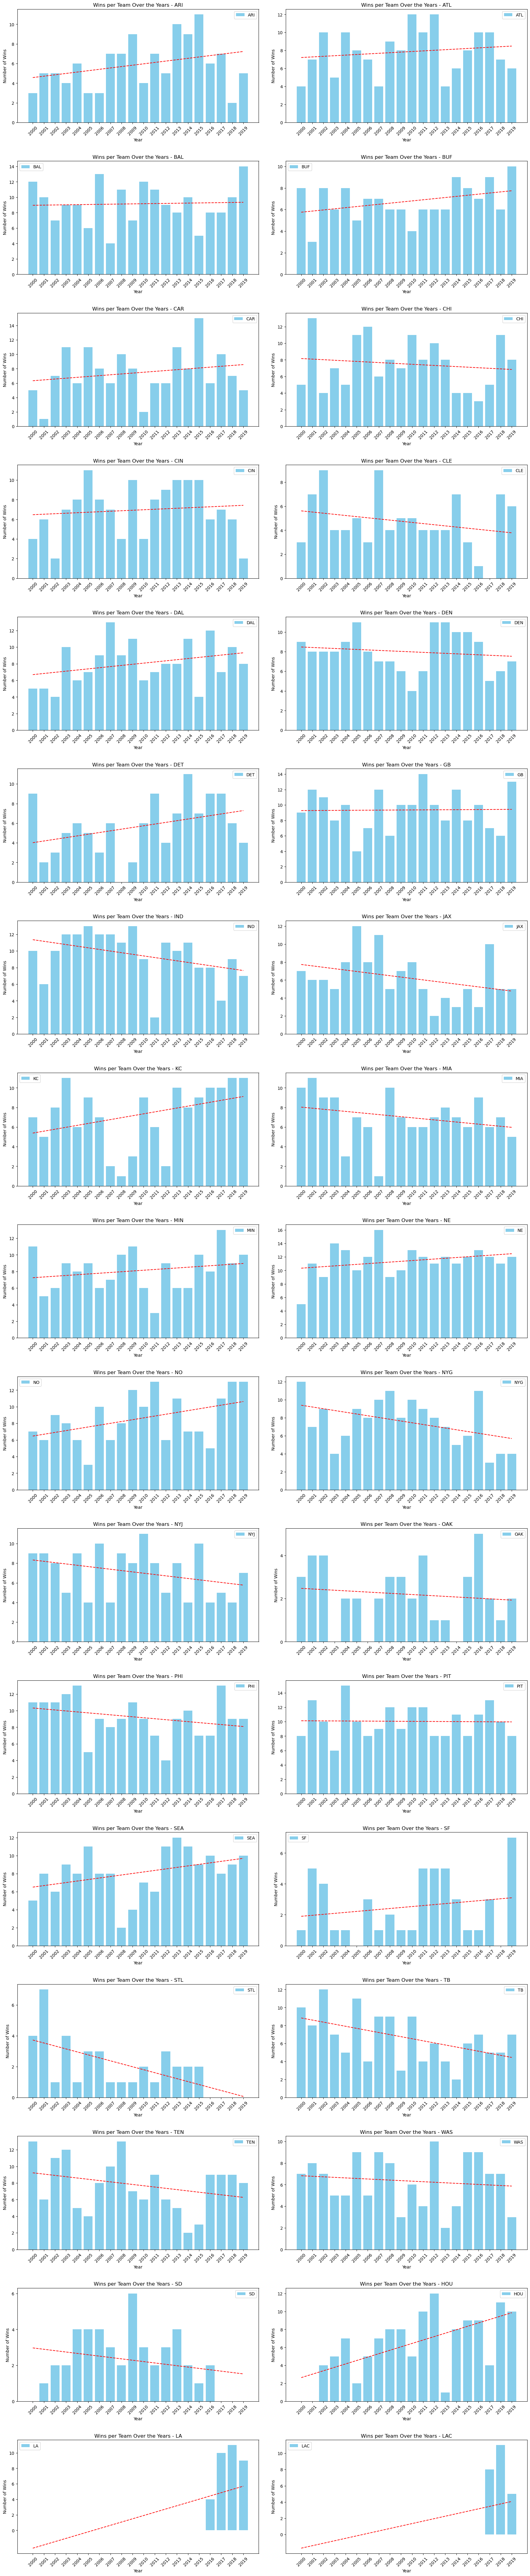

In [60]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Group by season and team and count the number of wins
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

# Pivot the table to have teams as columns and years as rows
wins_pivot = wins_per_season.pivot(index='season', columns='winning_team', values='wins').fillna(0)

# Plot each team separately
teams = wins_per_season['winning_team'].unique()
num_teams = len(teams)
num_cols = 2  # Number of columns for subplots
num_rows = (num_teams + 1) // num_cols  # Calculate number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5*num_rows))

for i, team in enumerate(teams):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]
    
    ax.bar(wins_pivot.index, wins_pivot[team], label=team, color='skyblue')
    ax.set_title(f'Wins per season - {team}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Wins')
    ax.legend()

    # Calculate trendline using linear regression
    x = np.array(wins_pivot.index).reshape(-1, 1)
    y = wins_pivot[team].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)
    trendline = model.predict(x)
    ax.plot(wins_pivot.index, trendline, color='red', linestyle='--', label='Trendline')

    ax.set_xticks(wins_pivot.index)
    ax.set_xticklabels(wins_pivot.index, rotation=45)

    # Set y-ticks to display only even numbers
    y_ticks = np.arange(0, max(wins_pivot[team]) + 1, 2)
    ax.set_yticks(y_ticks)

plt.tight_layout(pad=3.0)  # Increase padding between subplots
plt.show()

In [62]:
result[:10]

,game_id,season,week,gameday,weekday,wind,temp,home_team,away_team,home_score,...,team,team_name,weekly_attendance,last_name,team_abbr,Team,longitude,latitude,winning_team,home_team_win
26,2000_01_SF_ATL,2000,1,2000-09-03,Sunday,NaN,NaN,ATL,SF,36.0,...,Atlanta,Falcons,54626.0,Falcons,ATL,Falcons,-84.400972,33.757614,ATL,True
27,2000_01_JAX_CLE,2000,1,2000-09-03,Sunday,6.0,78.0,CLE,JAX,7.0,...,Cleveland,Browns,72418.0,Browns,CLE,Browns,-81.699564,41.506022,JAX,False
28,2000_01_IND_KC,2000,1,2000-09-03,Sunday,5.0,90.0,KC,IND,14.0,...,Kansas City,Chiefs,78357.0,Chiefs,KC,Chiefs,-94.484039,39.048914,IND,False
29,2000_01_CHI_MIN,2000,1,2000-09-03,Sunday,NaN,NaN,MIN,CHI,30.0,...,Minnesota,Vikings,64104.0,Vikings,MIN,Vikings,-93.258094,44.973881,MIN,True
30,2000_01_TB_NE,2000,1,2000-09-03,Sunday,5.0,71.0,NE,TB,16.0,...,New England,Patriots,60292.0,Patriots,NE,Patriots,-71.264350,42.090925,TB,False
31,2000_01_DET_NO,2000,1,2000-09-03,Sunday,NaN,NaN,NO,DET,10.0,...,New Orleans,Saints,64900.0,Saints,NO,Saints,-90.081364,29.950931,DET,False
32,2000_01_ARI_NYG,2000,1,2000-09-03,Sunday,3.0,80.0,NYG,ARI,21.0,...,New York,Giants,77434.0,Giants,NYG,Giants,-74.076983,40.812194,NYG,True
33,2000_01_BAL_PIT,2000,1,2000-09-03,Sunday,8.0,74.0,PIT,BAL,0.0,...,Pittsburgh,Steelers,55049.0,Steelers,PIT,Steelers,-80.015761,40.446786,BAL,False
34,2000_01_CAR_WAS,2000,1,2000-09-03,Sunday,0.0,80.0,WAS,CAR,20.0,...,Washington,Redskins,80257.0,Redskins,WAS,Redskins,-76.864517,38.907697,WAS,True
35,2000_01_PHI_DAL,2000,1,2000-09-03,Sunday,5.0,109.0,DAL,PHI,14.0,...,Dallas,Cowboys,62872.0,Cowboys,DAL,Cowboys,-97.092778,32.747778,PHI,False


C:\Users\Birkir\AppData\Local\Temp\ipykernel_9092\3722935137.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Birkir\AppData\Local\Temp\ipykernel_9092\3722935137.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Birkir\AppData\Local\Temp\ipykernel_9092\3722935137.py:26: UserWarning:

The figure layout has changed to tight



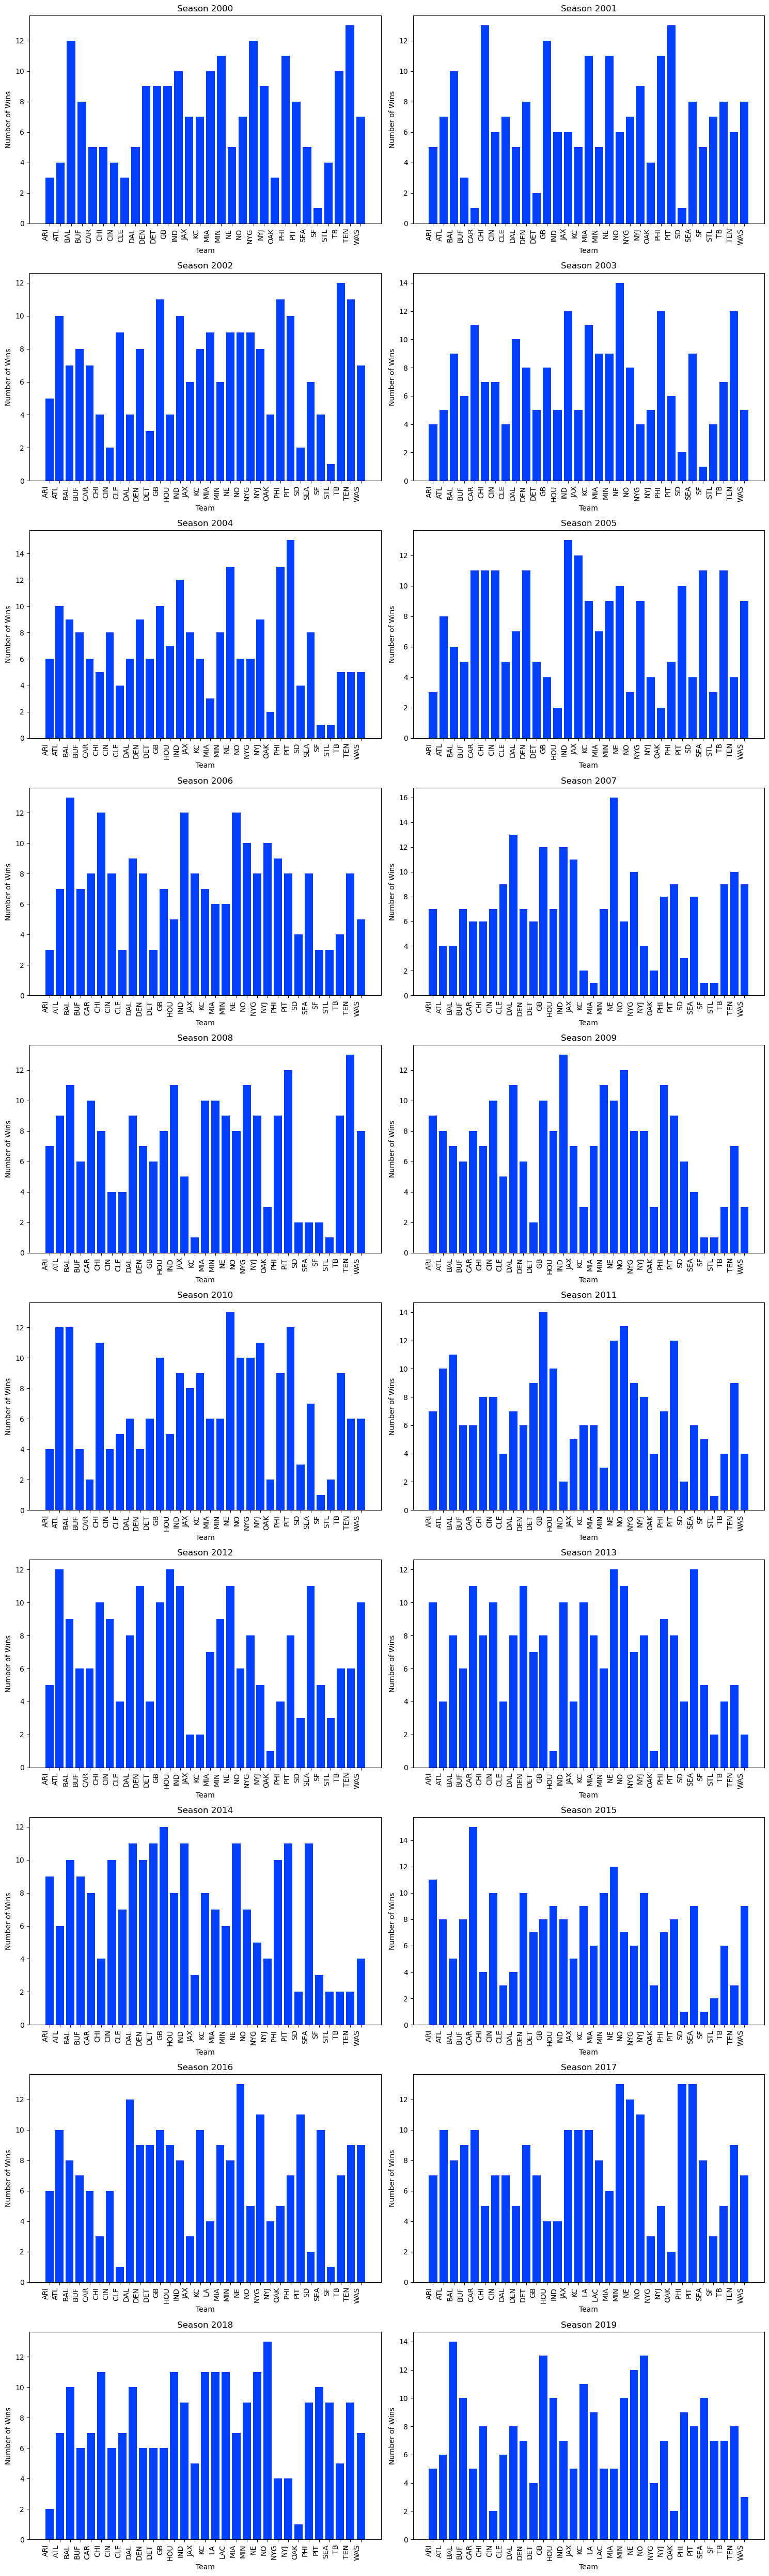

In [63]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Group by season and team and count the number of wins
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

# Get unique seasons
seasons = wins_per_season['season'].unique()

# Calculate the number of rows needed for subplots
num_rows = len(seasons) // 2 + (len(seasons) % 2 > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Iterate through each season and create a graph
for idx, season in enumerate(seasons):
    season_data = wins_per_season[wins_per_season['season'] == season]
    ax = axes[idx // 2, idx % 2]
    ax.bar(season_data['winning_team'], season_data['wins'])
    ax.set_title(f'Season {int(season)}')
    ax.set_xlabel('Team')
    ax.set_ylabel('Number of Wins')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticklabels(season_data['winning_team'], rotation=90, ha='right')
    plt.tight_layout()

# Hide empty subplots
if len(seasons) % 2 != 0:
    for i in range(len(seasons) % 2, 2):
        fig.delaxes(axes[num_rows - 1, i])

plt.show()


C:\Users\Birkir\AppData\Local\Temp\ipykernel_3004\1209015119.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



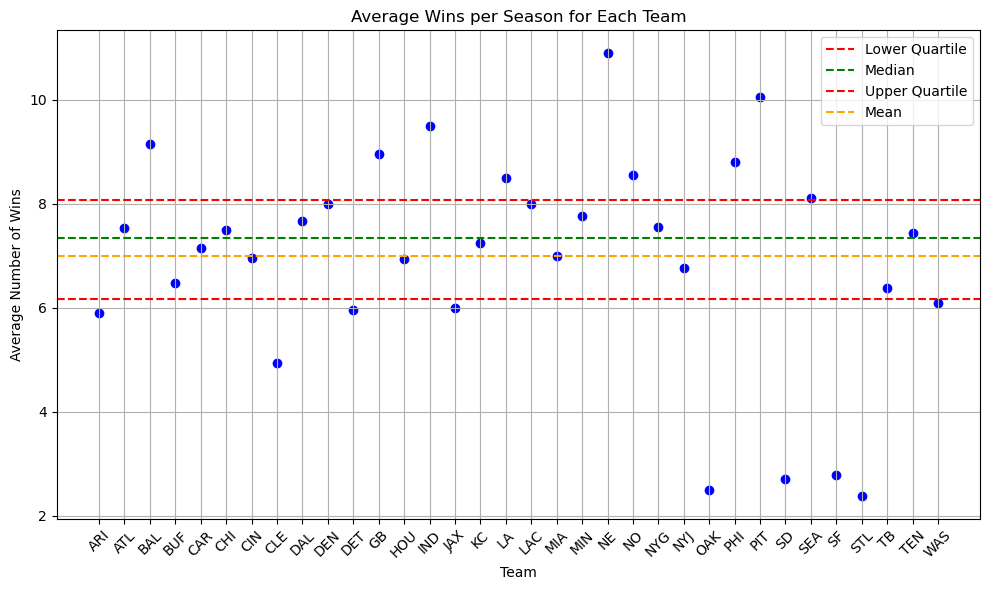

In [88]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Group by season and team and count the number of wins
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

# Calculate the average number of wins per season for each team
average_wins_per_team = wins_per_season.groupby('winning_team')['wins'].mean().reset_index()

# Calculate quartiles and median
lower_quartile = np.percentile(average_wins_per_team['wins'], 25)
median = np.percentile(average_wins_per_team['wins'], 50)
upper_quartile = np.percentile(average_wins_per_team['wins'], 75)
mean = average_wins_per_team['wins'].mean()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_wins_per_team['winning_team'], average_wins_per_team['wins'], color='blue')
plt.title('Average Wins per Season for Each Team')
plt.xlabel('Team')
plt.ylabel('Average Number of Wins')
plt.xticks(rotation=45)
plt.grid(True)

# Add quartiles and mean lines
plt.axhline(y=lower_quartile, color='r', linestyle='--', label='Lower Quartile')
plt.axhline(y=median, color='g', linestyle='--', label='Median')
plt.axhline(y=upper_quartile, color='r', linestyle='--', label='Upper Quartile')
plt.axhline(y=mean, color='orange', linestyle='--', label='Mean')

plt.legend()
plt.tight_layout()
plt.show()


In [89]:
# Correlation between temperature and weekly attendance
# Calculate correlation matrix
correlation_matrix = result[['temp', 'weekly_attendance']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       temp  weekly_attendance
temp               1.000000          -0.104355
weekly_attendance -0.104355           1.000000


C:\Users\Birkir\AppData\Local\Temp\ipykernel_3004\3965411805.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Birkir\AppData\Local\Temp\ipykernel_3004\3965411805.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



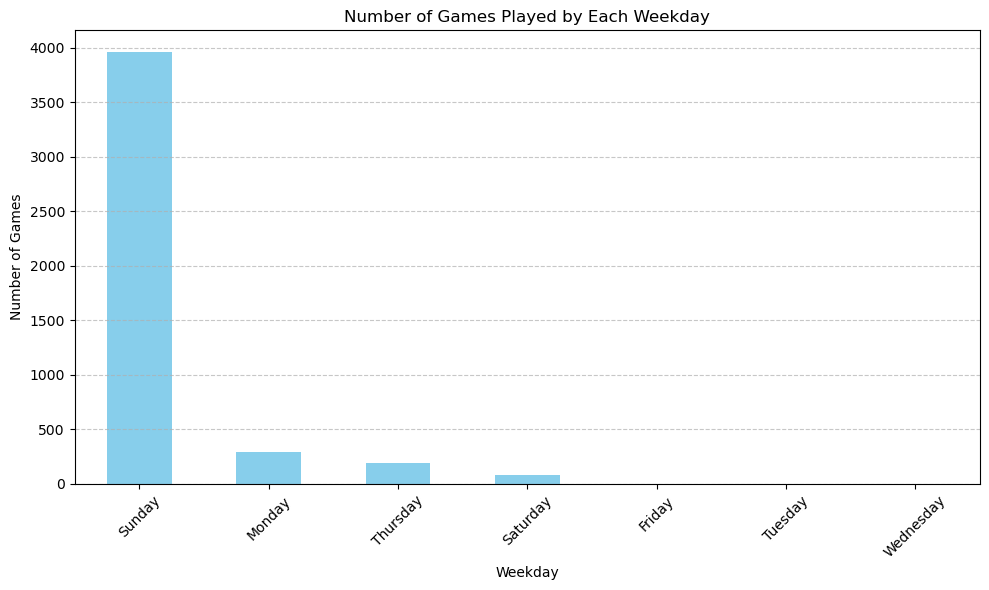

In [108]:
# Convert the "gameday" column to datetime format
result['gameday'] = pd.to_datetime(result['gameday'])

# Extract the weekday from the "gameday" column
result['weekday'] = result['gameday'].dt.day_name()

# Count the number of games for each weekday
games_by_weekday = result['weekday'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
games_by_weekday.plot(kind='bar', color='skyblue')
plt.title('Number of Games Played by Each Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [112]:
total_wins

NE     267
PIT    220
IND    210
GB     209
BAL    205
PHI    204
SEA    195
NO     192
DEN    189
DAL    171
ATL    170
MIN    169
NYG    168
KC     168
CAR    165
TEN    163
CHI    160
NYJ    154
SF     154
MIA    150
CIN    145
ARI    142
TB     141
SD     140
BUF    137
HOU    134
WAS    133
JAX    130
OAK    129
DET    114
STL    110
CLE     99
LA      39
LAC     27
Name: count, dtype: int64

In [114]:
# Create a DataFrame containing both home and away games
home_games = result.groupby(['season', 'home_team']).size().reset_index(name='home_games_played')
away_games = result.groupby(['season', 'away_team']).size().reset_index(name='away_games_played')

# Merge the home and away game DataFrames on team and season
games_per_season_per_team = pd.merge(home_games, away_games, left_on=['season', 'home_team'], right_on=['season', 'away_team'], how='outer')

# Fill NaN values with 0
games_per_season_per_team = games_per_season_per_team.fillna(0)

# Add the home and away games to get the total games played by each team in each season
games_per_season_per_team['total_games_played'] = (games_per_season_per_team['home_games_played'] + games_per_season_per_team['away_games_played']).astype(int)

# Drop unnecessary columns
games_per_season_per_team = games_per_season_per_team[['season', 'home_team', 'total_games_played']]

# Rename columns for consistency
games_per_season_per_team.rename(columns={'home_team': 'team_abbr'}, inplace=True)

# Display the result
print(games_per_season_per_team)

     season team_abbr  total_games_played
0      2000       ARI                  15
1      2000       ATL                  13
2      2000       BAL                  16
3      2000       BUF                  16
4      2000       CAR                  13
..      ...       ...                 ...
633    2017         0                   8
634    2018         0                   7
635    2018         0                   8
636    2019         0                   8
637    2019         0                   8

[638 rows x 3 columns]


In [115]:
games_per_season_per_team.iloc[-75:]

,season,team_abbr,total_games_played
563,2019,TEN,15
564,2019,WAS,16
565,2000,0,6
566,2000,0,6
567,2000,0,6
...,...,...,...
633,2017,0,8
634,2018,0,7
635,2018,0,8
636,2019,0,8


Afhverju eru sum Abbr 0????????

In [118]:
# Create a DataFrame containing both home and away games
home_games = result.groupby(['season', 'home_team']).size().reset_index(name='home_games_played')
away_games = result.groupby(['season', 'away_team']).size().reset_index(name='away_games_played')

# Merge the home and away game DataFrames on team and season
games_per_season_per_team = pd.merge(home_games, away_games, left_on=['season', 'home_team'], right_on=['season', 'away_team'], how='outer')

# Fill NaN values with 0
games_per_season_per_team = games_per_season_per_team.fillna(0)

# Add the home and away games to get the total games played by each team in each season
games_per_season_per_team['total_games_played'] = (games_per_season_per_team['home_games_played'] + games_per_season_per_team['away_games_played']).astype(int)

# Drop unnecessary columns
games_per_season_per_team = games_per_season_per_team[['season', 'home_team', 'total_games_played']]

# Rename columns for consistency
games_per_season_per_team.rename(columns={'home_team': 'team_abbr'}, inplace=True)

# Calculate total number of wins for each team in each season
total_wins_per_team_season = result.groupby(['season', 'winning_team']).size().reset_index(name='total_wins')

# Merge total wins with total games played
team_season_stats = pd.merge(games_per_season_per_team, total_wins_per_team_season, left_on=['season', 'team_abbr'], right_on=['season', 'winning_team'], how='left')

# Calculate win percentage for each team in each season
team_season_stats['win_percentage'] = (team_season_stats['total_wins'] / team_season_stats['total_games_played']) * 100

# Drop redundant columns
team_season_stats.drop(columns=['winning_team'], inplace=True)

# Display the result
print(team_season_stats)

     season team_abbr  total_games_played  total_wins  win_percentage
0      2000       ARI                  15         3.0       20.000000
1      2000       ATL                  13         4.0       30.769231
2      2000       BAL                  16        12.0       75.000000
3      2000       BUF                  16         8.0       50.000000
4      2000       CAR                  13         5.0       38.461538
..      ...       ...                 ...         ...             ...
633    2017         0                   8         NaN             NaN
634    2018         0                   7         NaN             NaN
635    2018         0                   8         NaN             NaN
636    2019         0                   8         NaN             NaN
637    2019         0                   8         NaN             NaN

[638 rows x 5 columns]


In [120]:
team_season_stats[:30]

,season,team_abbr,total_games_played,total_wins,win_percentage
0,2000,ARI,15,3.0,20.000000
1,2000,ATL,13,4.0,30.769231
2,2000,BAL,16,12.0,75.000000
3,2000,BUF,16,8.0,50.000000
4,2000,CAR,13,5.0,38.461538
5,2000,CHI,15,5.0,33.333333
6,2000,CIN,16,4.0,25.000000
7,2000,CLE,15,3.0,20.000000
8,2000,DAL,16,5.0,31.250000
9,2000,DEN,13,9.0,69.230769


In [129]:
# Filter rows where home_score equals away_score
equal_scores = result[result['home_score'] == result['away_score']]

# Display the result
equal_scores

,game_id,season,week,gameday,weekday,wind,temp,home_team,away_team,home_score,...,team,team_name,weekly_attendance,last_name,team_abbr,Team,longitude,latitude,winning_team,home_team_win
679,2002_10_ATL_PIT,2002,10,2002-11-10,Sunday,15.0,64.0,PIT,ATL,34.0,...,Pittsburgh,Steelers,62779.0,Steelers,PIT,Steelers,-80.015761,40.446786,ATL,False
2293,2008_11_PHI_CIN,2008,11,2008-11-16,Sunday,15.0,38.0,CIN,PHI,13.0,...,Cincinnati,Bengals,64633.0,Bengals,CIN,Bengals,-84.516039,39.095442,PHI,False
3647,2013_12_MIN_GB,2013,12,2013-11-24,Sunday,10.0,19.0,GB,MIN,26.0,...,Green Bay,Packers,77871.0,Packers,GB,Packers,-88.062167,44.501306,MIN,False
3826,2014_06_CAR_CIN,2014,6,2014-10-12,Sunday,5.0,60.0,CIN,CAR,37.0,...,Cincinnati,Bengals,57053.0,Bengals,CIN,Bengals,-84.516039,39.095442,CAR,False
4387,2016_07_SEA_ARI,2016,7,2016-10-23,Sunday,NaN,NaN,ARI,SEA,6.0,...,Arizona,Cardinals,65089.0,Cardinals,ARI,Cardinals,-112.262608,33.527700,SEA,False
4390,2016_08_WAS_CIN,2016,8,2016-10-30,Sunday,2.0,54.0,CIN,WAS,27.0,...,Cincinnati,Bengals,84488.0,Bengals,CIN,Bengals,-84.516039,39.095442,WAS,False
4818,2018_01_PIT_CLE,2018,1,2018-09-09,Sunday,11.0,58.0,CLE,PIT,21.0,...,Cleveland,Browns,67431.0,Browns,CLE,Browns,-81.699564,41.506022,PIT,False
4835,2018_02_MIN_GB,2018,2,2018-09-16,Sunday,5.0,80.0,GB,MIN,29.0,...,Green Bay,Packers,78461.0,Packers,GB,Packers,-88.062167,44.501306,MIN,False
5093,2019_01_DET_ARI,2019,1,2019-09-08,Sunday,NaN,NaN,ARI,DET,27.0,...,Arizona,Cardinals,60687.0,Cardinals,ARI,Cardinals,-112.262608,33.527700,DET,False


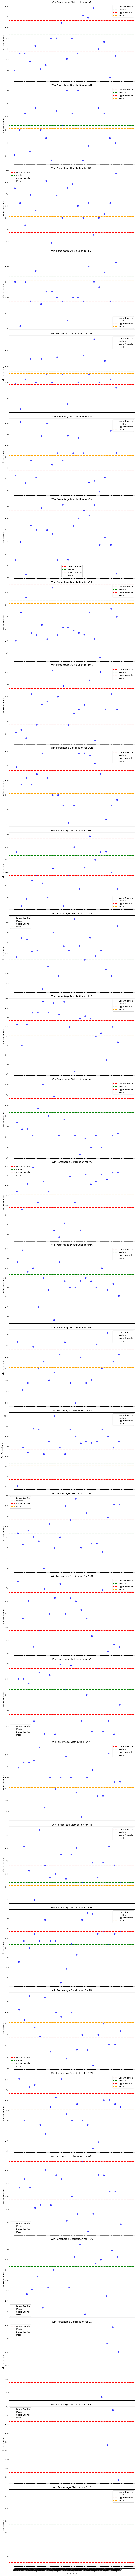

In [132]:
# Get unique team abbreviations
teams = team_season_stats['team_abbr'].unique()

# Calculate quartiles and mean
lower_quartile = team_season_stats['win_percentage'].quantile(0.25)
median = team_season_stats['win_percentage'].quantile(0.5)
upper_quartile = team_season_stats['win_percentage'].quantile(0.75)
mean = team_season_stats['win_percentage'].mean()

# Create subplots for each team
fig, axs = plt.subplots(len(teams), 1, figsize=(10, 6 * len(teams)), sharex=True)

for i, team in enumerate(teams):
    team_data = team_season_stats[team_season_stats['team_abbr'] == team]
    axs[i].scatter(team_data.index, team_data['win_percentage'], color='blue', s=50, alpha=0.7)
    axs[i].set_title(f'Win Percentage Distribution for {team}')
    axs[i].set_ylabel('Win Percentage')
    axs[i].axhline(y=lower_quartile, color='r', linestyle='--', label='Lower Quartile')
    axs[i].axhline(y=median, color='g', linestyle='--', label='Median')
    axs[i].axhline(y=upper_quartile, color='r', linestyle='--', label='Upper Quartile')
    axs[i].axhline(y=mean, color='orange', linestyle='--', label='Mean')
    axs[i].legend()

plt.xlabel('Team Index')
plt.xticks(range(len(team_season_stats)), team_season_stats['team_abbr'], rotation=45)
plt.tight_layout()
plt.show()